Carregamento da base de dados

In [27]:
import pandas as pd
import random
import numpy as np

In [4]:
dataset = pd.read_csv('Bases de dados/credit_data.csv')
dataset.shape

(2000, 5)

In [5]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [7]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

<AxesSubplot:xlabel='c#default', ylabel='count'>

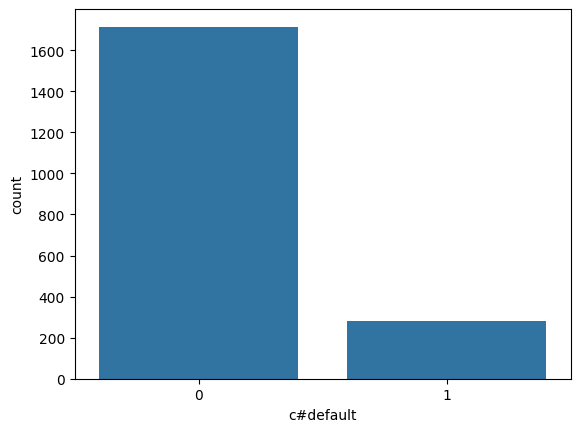

In [34]:
import seaborn as sns
sns.countplot(dataset,x='c#default')

In [19]:
X = dataset[dataset.columns.drop(['i#clientid','c#default'])].values
X.shape

(1997, 3)

In [23]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [25]:
y = dataset['c#default'].values
y.shape

(1997,)

In [26]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Base de treinamento e teste

In [29]:
from sklearn.model_selection import train_test_split #amostra estratificada

In [30]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2, stratify=y)

In [31]:
X_train.shape, y_train.shape

((1597, 3), (1597,))

In [32]:
X_test.shape, y_test.shape

((400, 3), (400,))

In [41]:
n_pagantes,pagantes = np.unique(y,return_counts=True)[1]
n_pagantes/len(dataset),pagantes/len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [43]:
n_pagantes_train,pagantes_train = np.unique(y_train,return_counts=True)[1]
n_pagantes_train/len(y_train),pagantes_train/len(y_train)

(0.8584846587351284, 0.14151534126487164)

In [44]:
n_pagantes_test,pagantes_test = np.unique(y_test,return_counts=True)[1]
n_pagantes_test/len(y_test),pagantes_test/len(y_test)

(0.8575, 0.1425)

Classificação com Naïve Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [48]:
modelo = GaussianNB()
modelo.fit(X_train,y_train)

GaussianNB()

In [50]:
previsoes = modelo.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,previsoes)

0.93

In [55]:
cm = confusion_matrix(y_test,previsoes)
cm

array([[340,   3],
       [ 25,  32]], dtype=int64)

<AxesSubplot:>

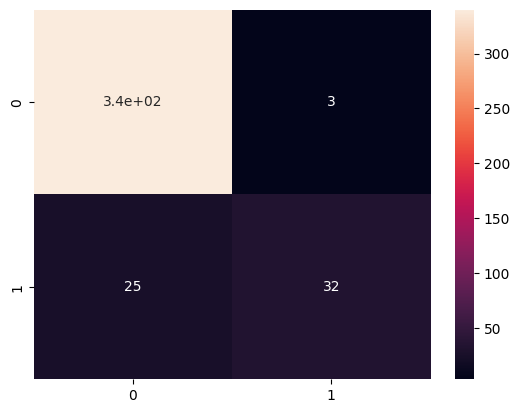

In [56]:
sns.heatmap(cm,annot=True)

Undersampling - Tomek Links

In [57]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X,y)
id_under = tl.sample_indices_

c:\Users\Diego Vinicius\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [67]:
X_under.shape, y_under.shape, id_under

((1897, 3),
 (1897,),
 array([   0,    1,    2, ..., 1994, 1995, 1996], dtype=int64))

In [68]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under, test_size=0.2,stratify=y_under)

X_train_u.shape, X_test_u.shape

((1517, 3), (380, 3))

In [71]:
modelo_u = GaussianNB()

modelo_u.fit(X_train_u, y_train_u)
previsoes_u = modelo_u.predict(X_test_u)
accuracy_score(y_test_u,previsoes_u)

0.9236842105263158

In [72]:
cm_u = confusion_matrix(y_test_u,previsoes_u)
cm_u

array([[314,   9],
       [ 20,  37]], dtype=int64)

Oversampling - SMOTE

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
smote = SMOTE(sampling_strategy='minority')

X_over, y_over = smote.fit_resample(X,y)

c:\Users\Diego Vinicius\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [75]:
X_over.shape ,y_over.shape

((3428, 3), (3428,))

In [76]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size=0.2,stratify=y_over)

X_train_o.shape, X_test_o.shape

((2742, 3), (686, 3))

In [77]:
modelo_o = GaussianNB()

modelo_o.fit(X_train_o, y_train_o)
previsoes_o = modelo_o.predict(X_test_o)
accuracy_score(y_test_o,previsoes_o)

0.9256559766763849

In [78]:
cm_o = confusion_matrix(y_test_o,previsoes_o)
cm_o

array([[308,  35],
       [ 16, 327]], dtype=int64)

o oversampling diminuiu o número de falsos positivos (embora tenha aumentado os falsos negativos, não é tão relevante para esse caso)

In [79]:
327/(16+327)

0.9533527696793003

o modelo com oversampling seria o escolhido

Exercício

In [80]:
ebay = pd.read_csv('Bases de dados/csv_result-ebay_confianca_completo.csv')

In [82]:
ebay.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [92]:
ebay['blacklist'] = ebay['blacklist'].apply(lambda x: 0 if x == 'N' else 1)

In [93]:
ebay['reputation'].unique()

array(['Bom', 'Ruim'], dtype=object)

<AxesSubplot:xlabel='reputation', ylabel='count'>

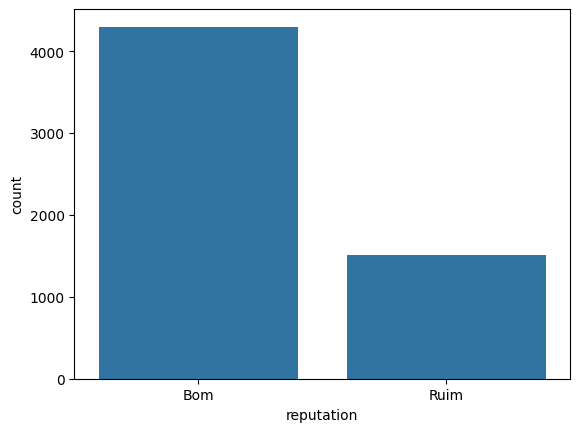

In [94]:
sns.countplot(ebay,x='reputation')

In [95]:
reputacao = 'reputation'
X_ex = ebay[ebay.columns.drop(reputacao)]
y_ex = ebay[reputacao]

In [112]:
smote_ex = SMOTE(sampling_strategy='minority')

X_over_ex, y_over_ex = smote_ex.fit_resample(X_ex,y_ex)

c:\Users\Diego Vinicius\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [113]:
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_over_ex, y_over_ex, test_size=0.2, stratify=y_over_ex)

In [114]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_ex,y_train_ex)

previsoes_ex = rfc.predict(X_test_ex)

In [115]:
accuracy_score(y_test_ex,previsoes_ex)

0.8034883720930233

In [116]:
cm_ex = confusion_matrix(y_test_ex,previsoes_ex)
cm_ex

array([[703, 157],
       [181, 679]], dtype=int64)